In [2]:
import warnings

# Ignore specific warning temporarily
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", message="Number of labels is 1.*")

# Import data

In [3]:
import pandas as pd

data = pd.read_csv('data/Anime Recommendation/anime.csv')

# We only need one identifier for the animes, in this case we will use the name
data.drop(columns = ['MAL_ID', 'English name', 'Japanese name'], inplace = True)
data.head()

,Name,Score,Genres,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


# Explore the dataset
* Do we have null data?
* Are there duplicated values?
* What type of data is each column?
* The categorical data has levels (easy - difficult or less - more)?

## 1. Do we have null data?

In [4]:
data.isnull().sum().sum()

0

This can also exist as a string such as 'Unknown' or 'Undefined', in data frame we can see there are some 'Unknown', lets find which features have this as categorical data, and how much it represents in percentage of the whole dataset.

In [5]:
categorical_data = data.columns[data.dtypes == object]
unknown_cat = []
percentages = []
for cat in categorical_data:
    if 'Unknown' in data[cat].unique():
        unknown_cat.append(cat)
        percentages.append(len(data[data[cat] == 'Unknown'])*100/len(data))
        print(f"Unkwnowns in {cat}: {len(data[data[cat] == 'Unknown'])*100/len(data)}%")
        

Unkwnowns in Score: 29.273431272064684%
Unkwnowns in Genres: 0.358729074137342%
Unkwnowns in Type: 0.21068215465208973%
Unkwnowns in Episodes: 2.9381619405534676%
Unkwnowns in Aired: 1.759480696959344%
Unkwnowns in Premiered: 72.98143719394146%
Unkwnowns in Producers: 44.379911171848306%
Unkwnowns in Licensors: 77.53103291196902%
Unkwnowns in Studios: 40.30862088600387%
Unkwnowns in Source: 20.31089853091903%
Unkwnowns in Duration: 3.160232319781346%
Unkwnowns in Rating: 3.9175492540712904%
Unkwnowns in Ranked: 10.033025851269787%
Unkwnowns in Score-10: 2.4883270698098165%
Unkwnowns in Score-9: 18.033253615761303%
Unkwnowns in Score-8: 7.806627946703109%
Unkwnowns in Score-7: 2.8641384808108414%
Unkwnowns in Score-6: 2.9096913791139962%
Unkwnowns in Score-5: 3.3253615761302813%
Unkwnowns in Score-4: 5.563147705272748%
Unkwnowns in Score-3: 7.442204760277873%
Unkwnowns in Score-2: 9.093497323767224%
Unkwnowns in Score-1: 2.6135975401434917%


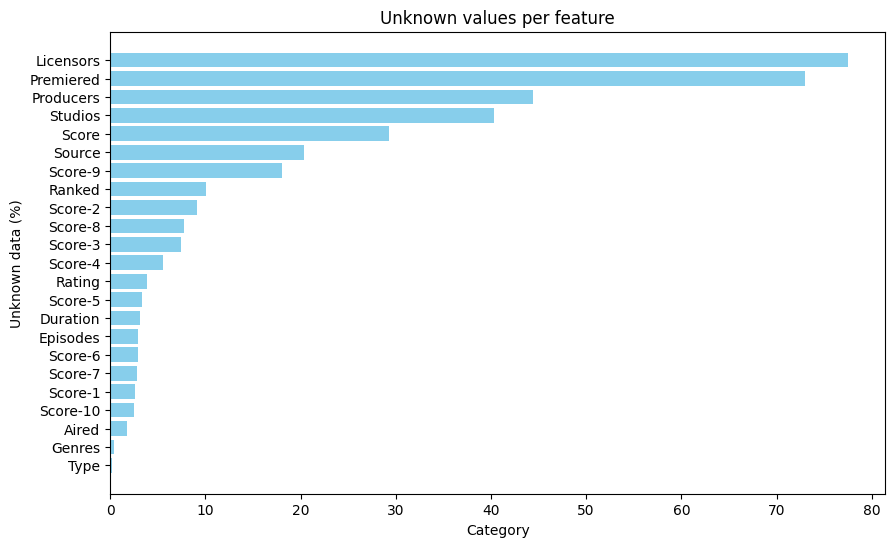

In [6]:
import matplotlib.pyplot as plt
# Combine the categories and values, then sort them by value in decreasing order
sorted_data = sorted(zip(unknown_cat, percentages), key=lambda x: x[1], reverse=True)
sorted_categories, sorted_values = zip(*sorted_data)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(sorted_categories, sorted_values, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Unknown data (%)')
plt.title('Unknown values per feature')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top
plt.show()

## 2. Are there duplicated values?

In [7]:
data.duplicated().sum()

0

## 3. What type of data is each column?

In [8]:
data.dtypes

Name             object
Score            object
Genres           object
Type             object
Episodes         object
Aired            object
Premiered        object
Producers        object
Licensors        object
Studios          object
Source           object
Duration         object
Rating           object
Ranked           object
Popularity        int64
Members           int64
Favorites         int64
Watching          int64
Completed         int64
On-Hold           int64
Dropped           int64
Plan to Watch     int64
Score-10         object
Score-9          object
Score-8          object
Score-7          object
Score-6          object
Score-5          object
Score-4          object
Score-3          object
Score-2          object
Score-1          object
dtype: object

We can see that numerical data (for example the scores) are objects instead of floats

## The categorical data has levels?

In [9]:
categorical_data = data.columns[data.dtypes == object]
for cat in categorical_data:
    # Only intented categorical data
    try:
        float(data[cat][0])
    except:
        print(f"{cat}: {data[cat].unique()}")
        print("")

Name: ['Cowboy Bebop' 'Cowboy Bebop: Tengoku no Tobira' 'Trigun' ...
 'Higurashi no Naku Koro ni Sotsu' 'Yama no Susume: Next Summit'
 'Scarlet Nexus']

Genres: ['Action, Adventure, Comedy, Drama, Sci-Fi, Space'
 'Action, Drama, Mystery, Sci-Fi, Space'
 'Action, Sci-Fi, Adventure, Comedy, Drama, Shounen' ...
 'Horror, Demons, Supernatural, Thriller' 'Sci-Fi, Space, Vampire'
 'Adventure, Mystery, Supernatural']

Type: ['TV' 'Movie' 'OVA' 'Special' 'ONA' 'Music' 'Unknown']

Aired: ['Apr 3, 1998 to Apr 24, 1999' 'Sep 1, 2001' 'Apr 1, 1998 to Sep 30, 1998'
 ... 'Sep 10, 2021 to ?' 'Mar 14, 2021' 'Mar 17, 2021 to ?']

Premiered: ['Spring 1998' 'Unknown' 'Summer 2002' 'Fall 2004' 'Spring 2005'
 'Fall 2002' 'Spring 2004' 'Fall 1999' 'Fall 2001' 'Spring 2003'
 'Fall 1995' 'Fall 1997' 'Winter 1996' 'Spring 2002' 'Winter 2005'
 'Spring 2001' 'Spring 1999' 'Fall 2003' 'Summer 2003' 'Summer 2004'
 'Fall 2005' 'Winter 2002' 'Summer 2005' 'Spring 1979' 'Spring 1985'
 'Spring 1986' 'Spring 1993' 'Spr

For the date data we can change them into Year, month and day in number. Nevertheless I prefer to use a 2 dimensional representations for month and day, this can represent the cyclic nature of the months and days of the weeks rather than just the number itself.

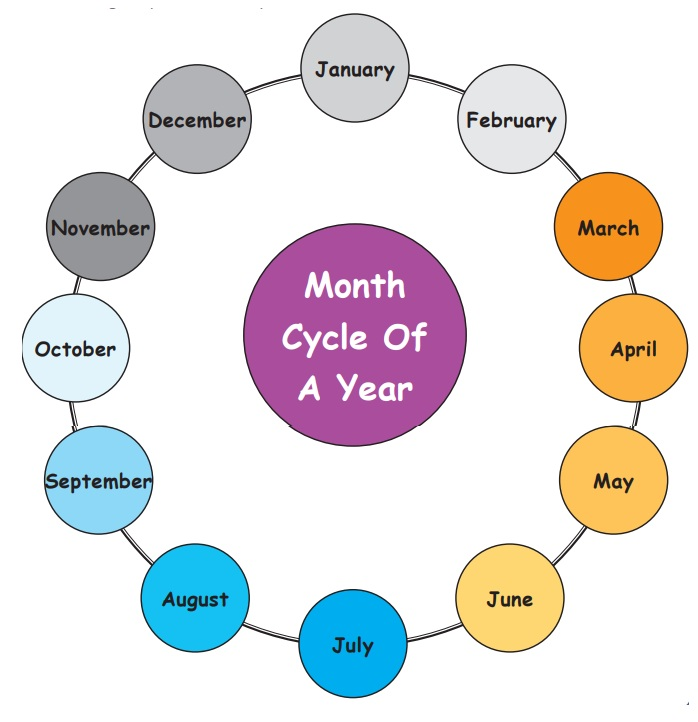

Finally we can see that the duration can also be represented by the number of minutes. All this transformations will be done at the feautre engineering section.

In [10]:
data['Popularity']

0           39
1          518
2          201
3         1467
4         4369
         ...  
17557    13116
17558    17562
17559    17558
17560    17565
17561    17563
Name: Popularity, Length: 17562, dtype: int64

# Clean dataset

We have seen before that we have no nan data nor duplicated data. But we do have some features with 'unknown' data. We need to do the following:

* N-Scores: 
    * First change type from string to float
    * Impute the unknown scores by a linear interpolation.
* Scores: (First change type from string to float) Recalculate the scores based on the information obtained.
* Premiered and Licensors: Remove this features (More than 70% of the information is unknown)
* Aired, keep years only since this might be the most relevant data (If we want to analyze performance of launching an Anime, months and days might be more relevant). 
* For the Duration and Rating Unknown values I took the average value. 
* For categorical data the unknown values can be a category by itself.
* Impute the unknown ranks as the average rank (not good or bad since is in the middle) and add an unkown rank feature (1 means unknown and 0 that we have a known feature)


In [11]:
import numpy as np
# Change type of scores 
data.replace({'Score': 'Unknown'}, 'NaN', inplace = True)
data['Score'] = data['Score'].astype(float)

# All scores (1 - 10)
score_cols = []
for ii in range(10):
    feature = 'Score-' + str(ii + 1)
    score_cols.append(feature)
    data.replace({feature: 'Unknown'}, 'NaN', inplace = True)
    data[feature] = data[feature].astype(float)

# Calculate values for unknown scores
data.loc[:, score_cols] = data[score_cols].interpolate(method='linear', axis=1, limit_direction='both')

# Recalculate the scores based on the imputated scores
data.loc[:, 'Score'] = (data[score_cols]*(1+np.arange(10))).sum(axis = 1)/((data[score_cols]).sum(axis = 1))

# Replace unknown scores to 5 (not good but not bad enough) and unknown score-i to 0 (no votes)
data.replace({'Score': np.nan}, 5, inplace = True)
for scorecol in score_cols:
    data.replace({scorecol: np.nan}, 0, inplace = True)

# Remove premiered and licensors features
data.drop(columns= {'Licensors', 'Premiered'}, inplace = True)

# Create OHE for categorical data
    # First for the genres (this are separated by commas in each row we need first each genre)
all_genres = set(genre.strip() for sublist in data['Genres'].str.split(',') for genre in sublist)
for genre in all_genres:
    data[genre] = data['Genres'].apply(lambda x: 1 if genre in x else 0)
data.drop(columns = 'Genres', inplace = True)

For 'Aired' feature we will use only the year. If only one year is shown we will consider this the same year of finishing. If we have something like 'Jan 23, 1992, ?' we consider '?' as still in air. We will use the current year as the last year

In [12]:
import re
from datetime import datetime
# Current year
current_year = datetime.now().year

def extract_years(date_str):
    current_year = datetime.now().year
    date_str = date_str.replace('?', str(current_year))
    years = re.findall(r'\d{4}', date_str)
    
    if len(years) == 1:
        return int(years[0]), int(years[0])
    elif len(years) == 2:
        return int(years[0]), int(years[1])
    else:
        return None, None  # Handle cases where no valid year is found
    
data['Initial Year'], data['Last Year'] = zip(*data['Aired'].apply(extract_years))

data.replace({'Initial Year': np.nan}, data['Initial Year'].mean(skipna = True), inplace = True)
data.replace({'Last Year': np.nan}, data['Last Year'].mean(skipna = True), inplace = True)

data.drop(columns= 'Aired', inplace=True)
data[['Initial Year', 'Last Year']]

,Initial Year,Last Year
0,1998.000000,1999.000000
1,2001.000000,2001.000000
2,1998.000000,1998.000000
3,2002.000000,2002.000000
4,2004.000000,2005.000000
...,...,...
17557,2021.000000,2024.000000
17558,2021.000000,2024.000000
17559,2021.000000,2024.000000
17560,2005.127166,2005.600185


In [13]:
# Remove Unknown values for the average value in Episodes
data.replace({'Episodes': 'Unknown'}, 'NaN', inplace = True)
data['Episodes'] = data['Episodes'].astype(float)

data.replace({'Episodes': np.nan}, data['Episodes'].mean(skipna = True), inplace = True)
data['Episodes']

0        26.000000
1         1.000000
2        26.000000
3        26.000000
4        52.000000
           ...    
17557    11.525519
17558    11.525519
17559    11.525519
17560    11.525519
17561    11.525519
Name: Episodes, Length: 17562, dtype: float64

In [14]:
# Transform 'Duration' data into minutes only
def convert_to_minutes(duration_str):
    # Regular expressions to capture hours and minutes
    hours_pattern = r'(\d+)\s*hr'
    minutes_pattern = r'(\d+)\s*min'
    
    # Find hours and minutes in the string
    hours_match = re.search(hours_pattern, duration_str)
    minutes_match = re.search(minutes_pattern, duration_str)
    unknown_match = re.search('Unknown', duration_str)

    # Convert to minutes
    total_minutes = 0
    
    if hours_match:
        hours = int(hours_match.group(1))
        total_minutes += hours * 60
    
    if minutes_match:
        minutes = int(minutes_match.group(1))
        total_minutes += minutes
    if unknown_match:
        total_minutes = np.nan

    return total_minutes

# Apply the function to the DataFrame
data.loc[:, 'Duration'] = data['Duration'].apply(convert_to_minutes)
data.loc[:, 'Duration'] = data['Duration'].astype(float)

# Get unknown duration data to be the mean rank
data.replace({'Duration': np.nan}, data['Duration'].mean(skipna = True), inplace = True)

C:\Users\gilbe\AppData\Local\Temp\ipykernel_12452\1854820143.py:32: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Duration': np.nan}, data['Duration'].mean(skipna = True), inplace = True)


# Feature engineering

Apply OHE and get a dataset without the names of the movies 

In [15]:
# Now the categorical data with OHE

# One Hot Encoding the rest of categorical data
columns = data.columns
categorical_features = columns[data.dtypes == object]
data = pd.get_dummies(data, columns = categorical_features[1:])

# Creat dataset without names
columns = data.columns
data_model = data[columns[1:]]
columns = data_model.columns
print(f"Number of non binary features: {len(columns) - len(columns[data_model.dtypes == bool])}")
data_model

Number of non binary features: 67


,Score,Episodes,Duration,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,...,Ranked_9987.0,Ranked_9989.0,Ranked_9991.0,Ranked_9992.0,Ranked_9993.0,Ranked_9996.0,Ranked_9997.0,Ranked_9998.0,Ranked_9999.0,Ranked_Unknown
0,8.740248,26.000000,24.000000,39,1251960,61971,105808,718161,71513,26678,...,False,False,False,False,False,False,False,False,False,False
1,8.390985,1.000000,115.000000,518,273145,1174,4143,208333,1935,770,...,False,False,False,False,False,False,False,False,False,False
2,8.215289,26.000000,24.000000,201,558913,12944,29113,343492,25465,13925,...,False,False,False,False,False,False,False,False,False,False
3,7.216657,26.000000,25.000000,1467,94683,587,4300,46165,5121,5378,...,False,False,False,False,False,False,False,False,False,False
4,6.892115,52.000000,23.000000,4369,13224,18,642,7314,766,1108,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,5.500000,11.525519,24.532839,13116,354,6,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
17558,5.000000,11.525519,24.532839,17562,7010,70,14,0,14,0,...,False,False,False,False,False,False,False,False,False,True
17559,5.500000,11.525519,24.532839,17558,11309,48,3,0,0,0,...,False,False,False,False,False,False,False,False,False,True
17560,5.000000,11.525519,24.532839,17565,1386,2,13,2,2,1,...,False,False,False,False,False,False,False,False,False,True


With this we finish cleaning the dataset with a total of 17562 rows and 15460 columns. From this, 15393 are booleans corresponding to the categorical data. We will apply PCA mainly to this features to reduce the categorical data to 33 features (just to have a total of 100 features). 

Apply PCA only to the boolean features

In [16]:
# Position again the target column to the end of the data
from sklearn.decomposition import PCA

pca_enc = PCA(n_components = 33)
pca_num = PCA(n_components = 33)

data_model.reset_index(inplace = True)
data_model.drop(columns = 'index', inplace = True)
columns = data_model.columns
red_cat_data = pca_enc.fit_transform(data_model[columns[data_model.dtypes == bool]])
pca_data = pd.concat([data_model[columns[data_model.dtypes != bool]], pd.DataFrame(red_cat_data)], axis = 1)
pca_data_np = pca_data.to_numpy()

C:\Users\gilbe\AppData\Local\Temp\ipykernel_12452\1379511651.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model.drop(columns = 'index', inplace = True)


In [17]:
# Perform standardization of the features
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
data_std = std_scaler.fit_transform(data_model)

## Customer segmentation

Here we would like to get a segmentation of customers, understanding which groups exists, their size and how they are related. For this we will use a couple of techniques such as K-means, HAC and DBSCAN. To evaluate performance of the clustering we will use the silhouette score.

## K-means

In [17]:
from tqdm import tqdm
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances

distance_matrix = pairwise_distances(pca_data_np)
np.fill_diagonal(distance_matrix, 0) # Remove computational errors of distances

100%|██████████| 40/40 [06:43<00:00, 10.08s/it]


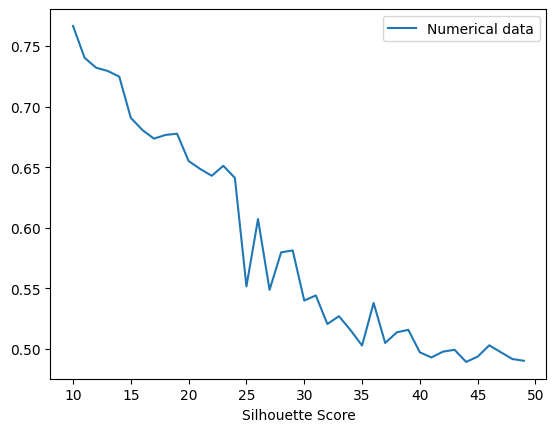

In [16]:
from tqdm import tqdm
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances

distance_matrix = pairwise_distances(pca_data_np)
np.fill_diagonal(distance_matrix, 0) # Remove computational errors of distances

n_clusters = np.arange(10, 50)
silhouette = []
for n_clust in tqdm(n_clusters):
    sil = 0
    for jj in range(5):
        kmeans = KMeans(n_clusters = n_clust, init = 'k-means++')
        kmeans.fit(pca_data_np)
        sil += silhouette_score(distance_matrix, kmeans.labels_, metric='precomputed')
    silhouette.append(sil/5)

plt.plot(n_clusters, silhouette, label = 'Numerical data')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.savefig('Images/Anime Recommendation/Kmeans.png')

By the silhouette score we can see that a clustering of 2 classes has a silhouette score of aproximately 0.6 which suggests that the clusters are well separated.

## Hierarchical Agglomerative Clustering

100%|██████████| 40/40 [1:45:45<00:00, 158.65s/it]


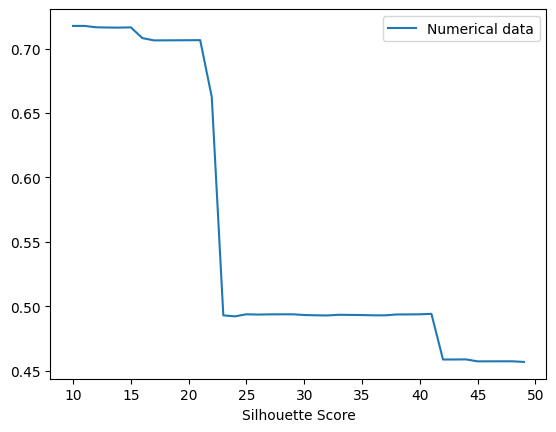

In [17]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = np.arange(10, 50)
silhouette = []

for n_clust in tqdm(n_clusters):
    sil = 0
    for ii in range(5):
        HAC = AgglomerativeClustering(n_clusters = n_clust, linkage = 'ward', metric = 'euclidean')
        HAC.fit(pca_data_np)
        sil += silhouette_score(distance_matrix, HAC.labels_, metric='precomputed')
    silhouette.append(sil/5)

plt.plot(n_clusters, silhouette, label = 'Numerical data')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.savefig('Images/Anime Recommendation/HAC.png')

## DBSCAN 

Here we need to decide for an optimal N and $\epsilon$ we will use grid search for this. But before, we will compute the maximum distance of nearest neighbors to get an idea of an optimal $\epsilon$ and $N$

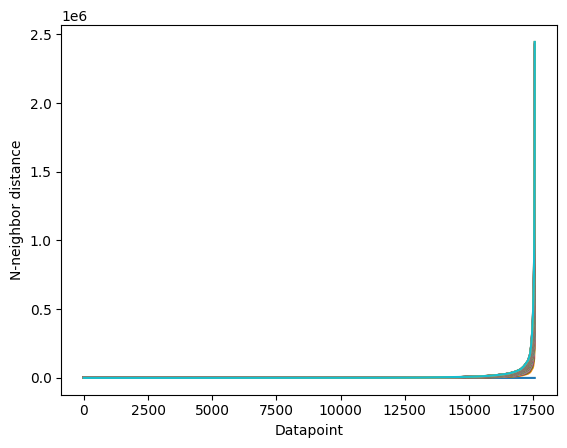

In [18]:
from sklearn.neighbors import NearestNeighbors

# Compute the k-nearest neighbors
neigh = NearestNeighbors(n_neighbors=100)
nbrs = neigh.fit(data_model)
distances, indices = nbrs.kneighbors(data_model)

# Sort distances
distances = np.sort(distances, axis=0)

#Plot distances
plt.plot(distances)
plt.ylabel('N-neighbor distance')
plt.xlabel('Datapoint')
plt.show()

Lets zoom before the elbow

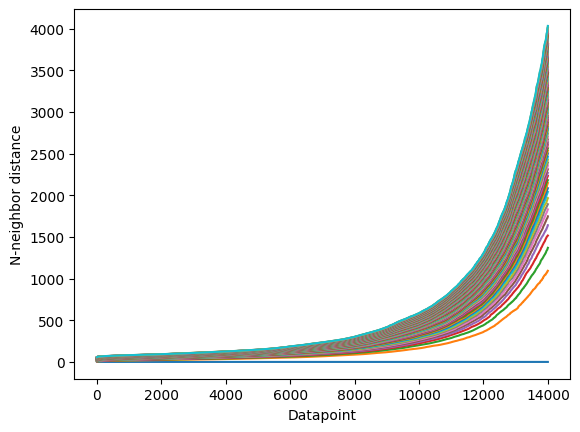

In [19]:
#Plot distances
plt.plot(distances[:14000])
plt.ylabel('N-neighbor distance')
plt.xlabel('Datapoint')
plt.show()

We can see most of the data points has neighbors with distances are below 2500, lets use a grid search to find the best parameters. Since this is a recommendation system we would like to have at least lets say 10 clusters. Otherwise we will guess we have only 2 types of customers which could by highly rare.

In [19]:
from sklearn.cluster import DBSCAN

epsilons = np.arange(1000, 17000, 250)
min_samples = np.arange(2, 10)

best_score = -1
best_params = {'eps': None, 'min_samples': None}

sil_scores = np.ones((len(epsilons), len(min_samples)))*-1
num_of_labels = np.zeros((len(epsilons), len(min_samples)))
ii = 0
for eps in epsilons:
    num_labels = 20
    jj = 0
    for min_sample in min_samples:
        #Increasing the number of min_sample reduces the number of labels,
        #if we want at least 10 labels we can stop increasing min_sample 
        #if we obtain less than 10 labels.
        if num_labels >= 10:
            dbscan = DBSCAN(eps=eps, min_samples=min_sample, metric = 'euclidean')
            labels = dbscan.fit_predict(pca_data_np)
            num_labels = len(set(labels))
            
        if num_labels >=10:
            num_of_labels[ii, jj] = num_labels
            #Calculate Silhouette_score
            score = silhouette_score(distance_matrix, labels, metric = 'precomputed')
            sil_scores[ii, jj] = score
            print(f"eps = {eps}, min_samples = {min_sample} - Silhouette Score: {score}, # of labels: {len(set(labels))}")

            if score > best_score:
                best_score = score
                best_params['eps'] = eps
                best_params['min_samples'] = min_sample
        jj +=1 
    ii+=1

print(f"Best Params: {best_params} with Silhouette Score: {best_score}")

eps = 1000, min_samples = 2 - Silhouette Score: -0.13829173170559794, # of labels: 183
eps = 1000, min_samples = 3 - Silhouette Score: -0.008707086981697323, # of labels: 66
eps = 1000, min_samples = 4 - Silhouette Score: 0.0043767133929311095, # of labels: 31
eps = 1000, min_samples = 5 - Silhouette Score: 0.30173617395353036, # of labels: 17
eps = 1000, min_samples = 6 - Silhouette Score: 0.26645820211303306, # of labels: 12
eps = 1000, min_samples = 7 - Silhouette Score: 0.26539072677818576, # of labels: 11
eps = 1250, min_samples = 2 - Silhouette Score: -0.0056483127687180015, # of labels: 163
eps = 1250, min_samples = 3 - Silhouette Score: 0.0658254199660711, # of labels: 67
eps = 1250, min_samples = 4 - Silhouette Score: 0.06872768523059461, # of labels: 34
eps = 1250, min_samples = 5 - Silhouette Score: 0.2798163602723221, # of labels: 19
eps = 1250, min_samples = 6 - Silhouette Score: 0.1960961179258615, # of labels: 14
eps = 1500, min_samples = 2 - Silhouette Score: 0.06972864

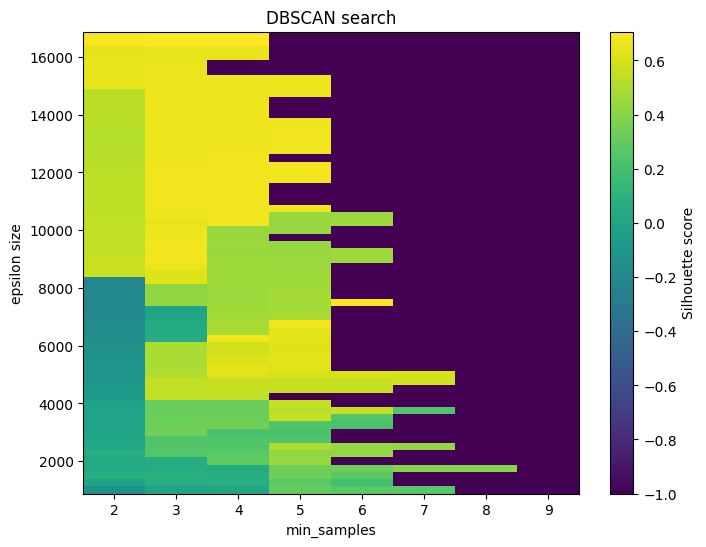

In [40]:
X, Y = np.meshgrid(min_samples, epsilons)
plt.figure(figsize=(8, 6))
plt.pcolormesh(X, Y, sil_scores, shading='auto')
plt.colorbar(label='Silhouette score')
plt.xlabel('min_samples')
plt.ylabel('epsilon size')
plt.title('DBSCAN search')
plt.savefig('Images/Anime Recommendation/DBSCAN.png')

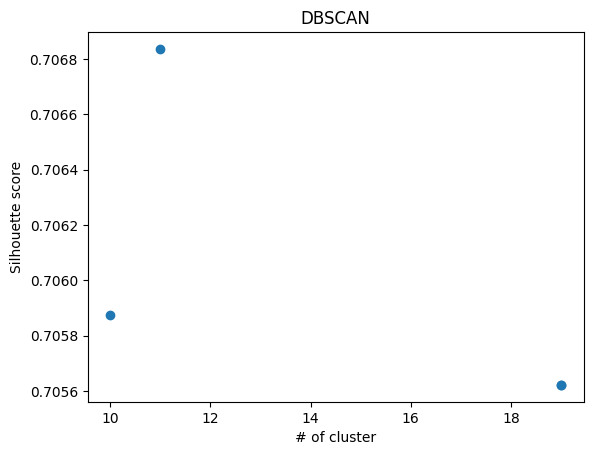

In [53]:
# Get positions of sil_scores greater than 0.7
indices = np.argwhere(sil_scores > 0.7)

# Get number of labels
num_clusters = [num_of_labels[(ii[0], ii[1])] for ii in indices]
sil_scores_dbscan = [sil_scores[(ii[0], ii[1])] for ii in indices]

plt.scatter(num_clusters, sil_scores_dbscan)
plt.xlabel('# of cluster')
plt.ylabel('Silhouette score')
plt.title('DBSCAN')
plt.savefig('Images/Anime Recommendation/DBSCAN_above_07.png')